In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [31]:
weather_df = pd.read_csv("weatherAUS.csv")

In [32]:
weather_df = weather_df.fillna(0)

In [33]:
for column in weather_df.columns:
    print(column)

Date
Location
MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustDir
WindGustSpeed
WindDir9am
WindDir3pm
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm
RainToday
RainTomorrow


In [34]:
weather_df["Date"] = weather_df["Date"].astype('datetime64[ns]')

In [35]:
time_deltas = {"week":
                   [timedelta(days=-1), timedelta(days=-2), 
                    timedelta(days=-3), timedelta(days=-4)],
              "1year":
                   [timedelta(days=-365), timedelta(days=-366), 
                    timedelta(days=-367), timedelta(days=-368), timedelta(days=-369)],
               "2years":
                   [timedelta(days=-730), timedelta(days=-731),
                    timedelta(days=-732), timedelta(days=-733), timedelta(days=-734)]
              }

In [36]:
weather_df["RainToday"] = weather_df["RainToday"].apply(lambda x: 1 if x=="Yes" else 0)
weather_df["RainTomorrow"] = weather_df["RainTomorrow"].apply(lambda x: 1 if x=="Yes" else 0)

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
weather_df["Year"] = weather_df["Date"].apply(lambda x: x.year)
weather_df["Month"] = weather_df["Date"].apply(lambda x: x.month)
weather_df["Day"] = weather_df["Date"].apply(lambda x: x.day)
weather_df = weather_df.drop(["Date"], axis=1)


In [39]:
y = pd.get_dummies(weather_df.WindGustDir, prefix='WindGustDir')
a = weather_df.copy()
weather_df = a.join(y, how="outer").drop(["WindGustDir"], axis=1)

In [40]:
y = pd.get_dummies(weather_df.WindDir9am, prefix="WindDir9am")
a = weather_df.copy()
weather_df = a.join(y, how="outer").drop(["WindDir9am"], axis=1)

In [41]:
y = pd.get_dummies(weather_df.WindDir3pm, prefix="WindDir3pm")
a = weather_df.copy()
weather_df = a.join(y, how="outer").drop(["WindDir3pm"], axis=1)

In [42]:
y = pd.get_dummies(weather_df.Location, prefix="Location")
a = weather_df.copy()
weather_df = a.join(y, how="outer").drop(["Location"], axis=1)

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.cluster import KMeans

In [44]:
scaler = StandardScaler()
scaled_data = scaler.fit(weather_df.values)
scaled_data = scaler.transform(weather_df.values)
scaled_df = pd.DataFrame(scaled_data, index=weather_df.index, columns=weather_df.columns)

In [74]:
X = scaled_df.drop(["RainTomorrow"], axis=1)[1:]
y = weather_df["RainTomorrow"][1:]
prev_day = scaled_df.copy()
prev_day.columns = list(map(lambda x:x+"_prev_day", prev_day.columns))
X = X.join(prev_day[:-1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [77]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [88]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [92]:
y_train_pred = svc_model.predict(X_train)
print("Train Accuracy Score")
print(accuracy_score(y_train, y_train_pred))

Train Accuracy Score
1.0


In [90]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[79410     0]
 [    0 22411]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79410
           1       1.00      1.00      1.00     22411

    accuracy                           1.00    101821
   macro avg       1.00      1.00      1.00    101821
weighted avg       1.00      1.00      1.00    101821



In [91]:
print("Test accuracy score")
accuracy_score(y_pred, y_test)

Test accuracy score


0.9998854209633805

In [86]:
y_pred = svc_model.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

[[34169     2]
 [    3  9464]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34171
           1       1.00      1.00      1.00      9467

    accuracy                           1.00     43638
   macro avg       1.00      1.00      1.00     43638
weighted avg       1.00      1.00      1.00     43638



In [81]:
maxscore = 0
least_error_model = None
accuracies = []

for neighbors in range(1, 50, 5):
    knn = KNeighborsClassifier(neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    accuracies.append(accuracy)
    print("Clusters : ", neighbors)
    print("Accuracy : ", accuracy)
    print("\n\n")
    if maxscore <= accuracy:
        maxscore = accuracy
        least_error_model = knn

print(least_error_model)
print(maxscore)
plt.plot(accuracies)

[[33814  7100]
 [  358  2366]]
              precision    recall  f1-score   support

           0       0.99      0.83      0.90     40914
           1       0.25      0.87      0.39      2724

    accuracy                           0.83     43638
   macro avg       0.62      0.85      0.64     43638
weighted avg       0.94      0.83      0.87     43638



Neighbors :  1
Accuracy :  0.7830789678720381



Neighbors :  6
Accuracy :  0.09860671891470736



Neighbors :  11
Accuracy :  0.12392868600760805



Neighbors :  16
Accuracy :  0.06166643750859343



Neighbors :  21
Accuracy :  0.02188459599431688



Neighbors :  26
Accuracy :  0.02007424721572941



Neighbors :  31
Accuracy :  0.02949264402584903



Neighbors :  36
Accuracy :  0.031394656033732066



Neighbors :  41
Accuracy :  0.01938677299601265



Neighbors :  46
Accuracy :  0.017141023878271232



KMeans(n_clusters=1)
0.7830789678720381


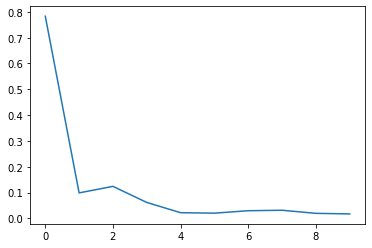

In [83]:
maxscore = 0
least_error_model = None
accuracies = []

for neighbors in range(1, 50, 5):
    knn = KMeans(neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    accuracies.append(accuracy)
    print("Clusters : ", neighbors)
    print("Accuracy : ", accuracy)
    print("\n\n")
    if maxscore <= accuracy:
        maxscore = accuracy
        least_error_model = knn

print(least_error_model)
print(maxscore)
plt.plot(accuracies)